<a href="https://colab.research.google.com/github/KajetanFrackowiak/tensorflow_fundamentals/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [185]:
import tensorflow as tf
print(tf.__version__)

2.15.0


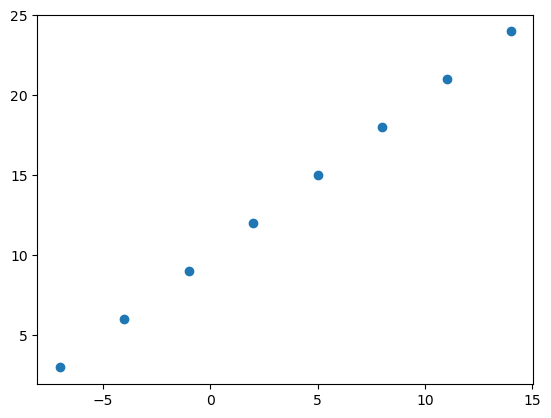

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [187]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shape

In [188]:
# Create a demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [189]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [190]:
X[0].ndim

0

In [191]:
X[0], y[0]

(-7.0, 3.0)

In [192]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [193]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

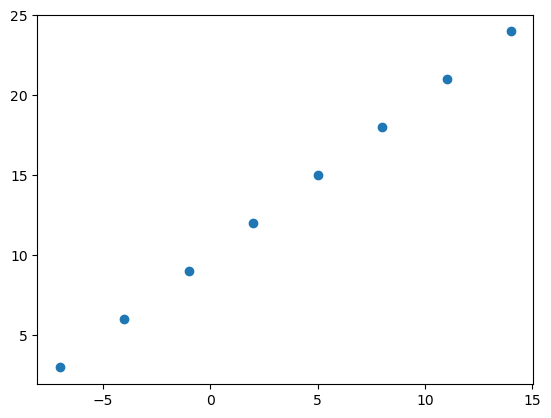

In [194]:
plt.scatter(X, y)

# Modelling with TensorFlow

**1. Creating a model**

**2. Compiling a model**

**3. Fitting a model**

In [330]:
import wandb
from wandb.keras import WandbCallback

def initialize_wandb(project_name, run_name):
    wandb.init(project=project_name, name=run_name)
    wandb.config.learning_rate = 0.001
    wandb.config.batch_size = 64

In [332]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))  # Specify input_shape for the first layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 5ms/step - loss: 51.1354 - mae: 51.1354
Epoch 2/5
2/2 [==============================] - 0s 3ms/step - loss: 14.0344 - mae: 14.0344
Epoch 3/5
2/2 [==============================] - 0s 4ms/step - loss: 16.5007 - mae: 16.5007
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 10.2060 - mae: 10.2060
Epoch 5/5
2/2 [==============================] - 0s 5ms/step - loss: 12.3356 - mae: 12.3356


In [333]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 42ms/step


array([[12.490474]], dtype=float32)

In [334]:
y_pred + 11

array([[23.490475]], dtype=float32)

# Improving our model
We can improve our model. by altering the steps we took to create a model.

**1. Creating a model**

**2. Compiling a model**

**3. Fitting a model**

In [335]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0429 - mae: 10.0429
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0410 - mae: 10.0410
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0355 - mae: 10.0355
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0317 - mae: 10.0317
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0278 - mae: 10.0278
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0274 - mae: 10.0274
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0246 - mae: 10.0246
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0205 - mae: 10.0205
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0163 - mae: 10.0163
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0143 - mae: 10.0143
Epoch 11/100
2/2 [==============================] - 0s 3ms/

In [336]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [337]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 43ms/step


array([[16.835936]], dtype=float32)

In [338]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),

    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 68.8554 - mae: 68.8554
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 44.6879 - mae: 44.6879
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 24.0533 - mae: 24.0533
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 10.6799 - mae: 10.6799
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 16.1182 - mae: 16.1182
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 18.0734 - mae: 18.0734
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 13.1678 - mae: 13.1678
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 9.4650 - mae: 9.4650
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 8.6757 - mae: 8.6757
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 11.5451 - mae: 11.5451
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 11

In [339]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [340]:
X.ndim, y.ndim

(1, 1)

In [341]:
model.predict([17.0])

1/1 [==============================] - 0s 46ms/step


array([[26.666828]], dtype=float32)

In [342]:
# Common ways to improve a deep model:
# Adding layers
# Increase the number of hidden units
# Change the activation functions
# Change the optimization function
# Change the learning rate
# Fitting on more data
# Fitting for longer (more epochs)

# Evaluting a model

**In practice, a typical workflow you'll go through when building neural netwroks:**

**Build a model -> fit it -> evaluate it -> tweak a model->
fit it -> evaluate it -> tweak a model ->
fit it -> evaluate it ...**

When it comes to evaluation.. there are 3 words you should memorize:

**Visualize, visualize, visualize**

**It's good idea to visualize:**

**The data**

**The model itself**

**The training of a model - how does a model perform while it learns?**

**The predictions of the modle**

In [343]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [344]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

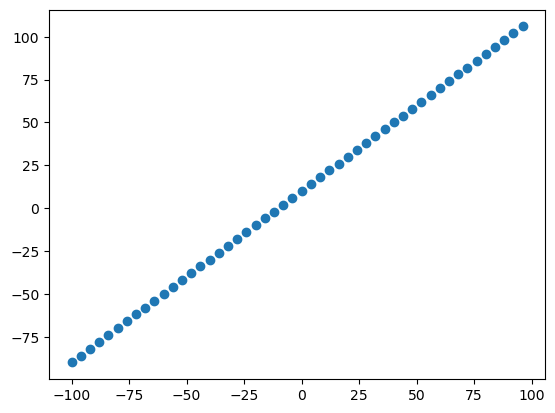

In [345]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

# The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data availale.

**Generalization** = The ability for a machine learning model to perform well on data it hasn't seen before

In [346]:
# Check the length of how many samples we have
len(X)

50

In [347]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

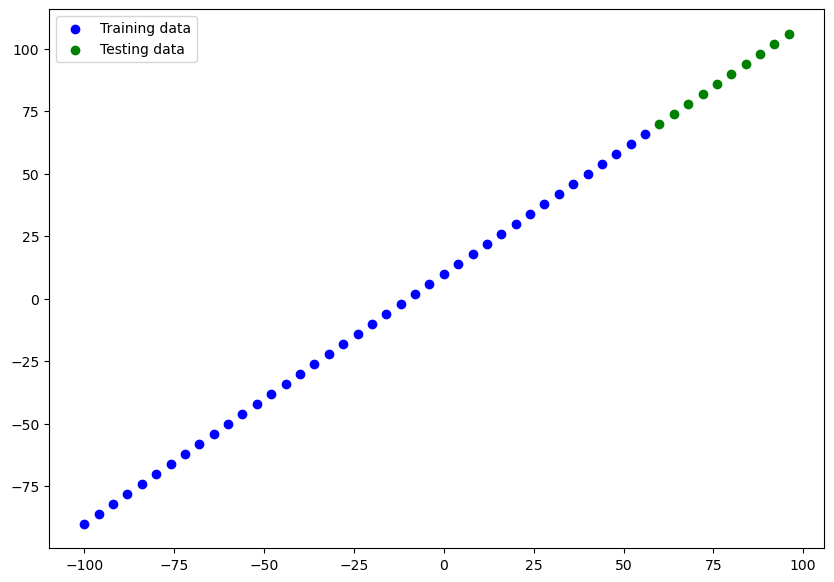

In [348]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [349]:
# # Let's have a look at how to build a neural network for our data

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape)
# ])

# # 2.Compile the model
# model.compile(loss=tf.keras.losses.mae,
#              optimizer=tf.keras.optimizers.SGD(),
#              metrics="mae")

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [350]:
def reset_model():
    # Clear the prevous session
    tf.keras.backend.clear_session()

# Visualizing

In [281]:
reset_model()

In [389]:
# Let's create a model which builds automatically by defining the input_shape arguent in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
initialize_wandb(project_name="regression_fundamentals", run_name="Dense10,1_mae_SGD")
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▂▂▁▁▁▂▁▁▁▁▂▂█▁▂▁▁▂▁▁▁▄▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁
mae,▂▂▁▁▁▂▁▁▁▁▂▂█▁▂▁▁▂▁▁▁▄▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁
epoch,99
loss,40.76685
mae,40.76685


In [283]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters whithin a layer, check out MIT's introduction to deep learning video.

**Exercise:** Try playing around with the number ofidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summar().

 ### Let's fit our model to the training data

In [354]:
 model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[WandbCallback()])

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 29.4347 - mae: 29.4347
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 25.7765 - mae: 25.7765
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 31.6437 - mae: 31.6437
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 24.3638 - mae: 24.3638
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.4691 - mae: 14.4691
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.5383 - mae: 11.5383
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5781 - mae: 12.5781
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0038 - mae: 11.0038
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 39.3145 - mae: 39.3145
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 26.8548 - mae: 26.8548
Epoch 11/100
2/2 [==============================] - 0s 3ms/

In [355]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


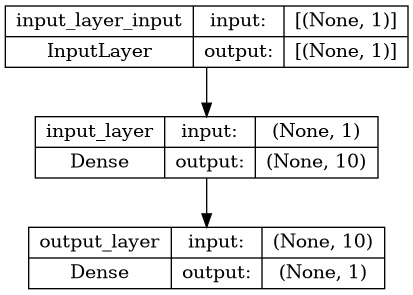

In [356]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model=model, show_shapes=True)

In [357]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing our model predictions
To visualize predictions, it's a good idea to plot them against the groud truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred

In [358]:
# MAke some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 34ms/step


array([[ 91.2572  ],
       [ 97.21643 ],
       [103.175644],
       [109.134865],
       [115.09408 ],
       [121.05328 ],
       [127.01251 ],
       [132.97173 ],
       [138.93094 ],
       [144.89015 ]], dtype=float32)

In [359]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [360]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # PLot model's predicting in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

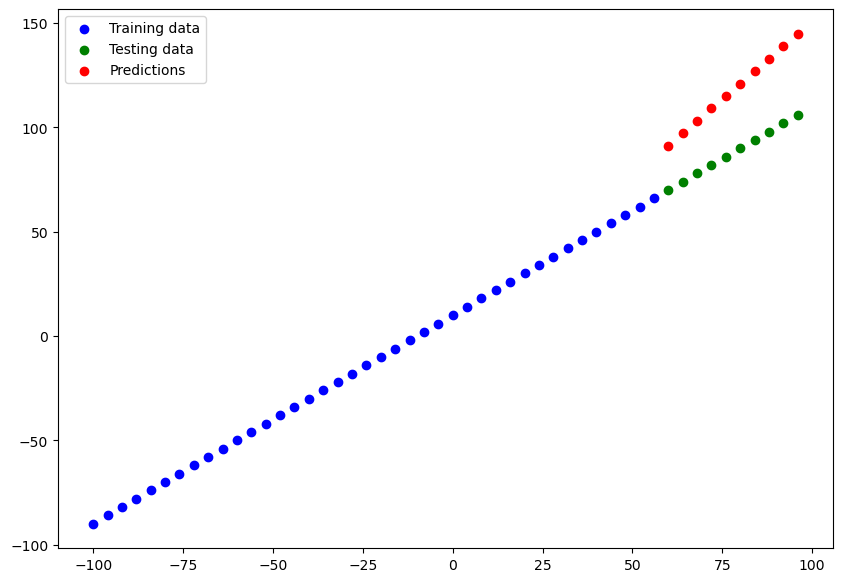

In [361]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how rong is each of my model's predictions"
* MSE - mean square, "square the average errors:

In [362]:
# Evalute the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 71ms/step - loss: 30.0737 - mae: 30.0737


[30.073680877685547, 30.073680877685547]

In [363]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.25144 , 12.086573, 15.740515, 21.134865, 27.09408 , 33.053284,
       39.012512, 44.971725, 50.93094 , 56.89015 ], dtype=float32)>

In [364]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 91.2572  ],
       [ 97.21643 ],
       [103.175644],
       [109.134865],
       [115.09408 ],
       [121.05328 ],
       [127.01251 ],
       [132.97173 ],
       [138.93094 ],
       [144.89015 ]], dtype=float32)>

In [365]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [366]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.2572  ,  97.21643 , 103.175644, 109.134865, 115.09408 ,
       121.05328 , 127.01251 , 132.97173 , 138.93094 , 144.89015 ],
      dtype=float32)>

In [367]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.07368>

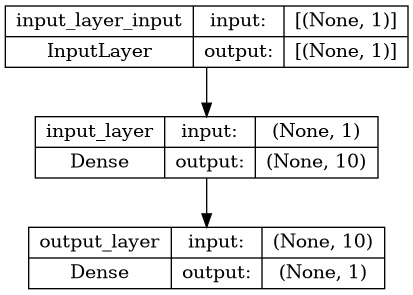

In [368]:

plot_model(model=model, show_shapes=True)

In [369]:
# Calcualte the Mean Square Error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                            y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=936.09436>

In [370]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

# Running experiments to improve
Build a model -> fit it -> evaluate it -> tweak it -> fit it
-> evaluate it -> tweak it -> fit it -> evaluate it...

1. Get more data - get more examples for your model to train
on (more opportunities to learn patterns or relationships
between features and labels).
2. Make your model larger (using a more complex model( - this mmight come in the form of more layers or more hidden units
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. model_1 - same as the original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs
4. model_4 - 3 layers, trained for 500 epochs
5. model_5 - 4 layers, trained for 500 epochs

In [371]:
X_train.ndim, y_train.ndim

(1, 1)

In [375]:
X_train = tf.expand_dims(X_train, axis=-1)

In [388]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
initialize_wandb(project_name="regression_fundamentals", run_name="experiment_with_Dense1_mae_SGD")
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, callbacks=[WandbCallback()])

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▆▁▁▁▁▁▁▁▁▂▂█▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,▁▆▁▁▁▁▁▁▁▁▂▂█▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,99
loss,40.71293
mse,2245.49902


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 41.1695 - mae: 41.1695
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 40.8905 - mae: 40.8905
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 41.1388 - mae: 41.1388
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 40.6711 - mae: 40.6711
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 40.4633 - mae: 40.4633
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 40.7312 - mae: 40.7312
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 40.7494 - mae: 40.7494
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4288 - mae: 40.4288
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.6649 - mae: 40.6649
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 40.2311 - mae: 40.2311
Epoch 11/100
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 30ms/step


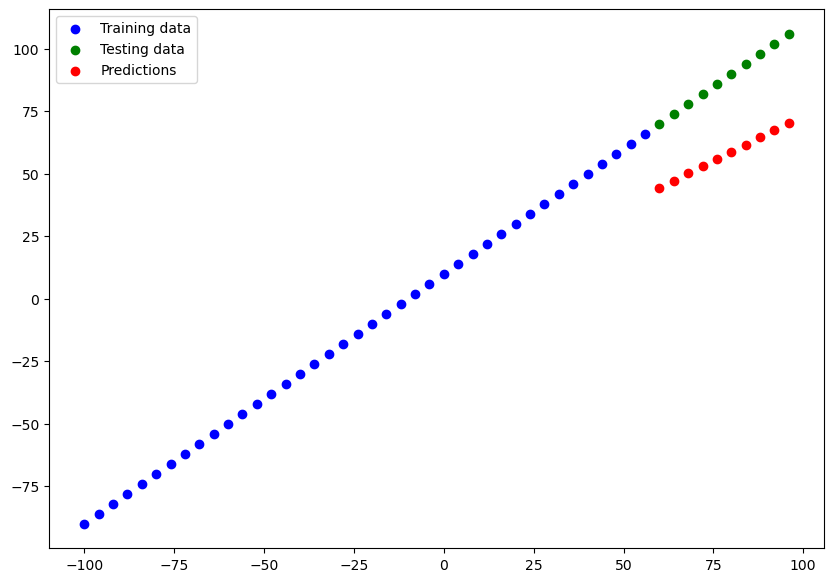

In [380]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [381]:
%who -p function

initialize_wandb	 mae	 mse	 plot_model	 plot_predictions	 reset_model	 


In [382]:
help(plot_predictions)

Help on function plot_predictions in module __main__:

plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>, train_labels=<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66], dtype=int32)>, test_data=<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>, test_labels=<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>, predictions=array([[ 91.2572  ],
       

In [383]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.630808>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.69446>)

In [387]:
X_train = tf.expand_dims(X_train, axis=-1)
tf.random.set_seed(42)

# 1. Create the model
initialize_wandb(project_name="regression_fundamentals", run_name="Dense20_1,mae,SGD")
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, callbacks=[WandbCallback()])

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▆▆▅▆▆▆▆▅█▆▅▆▅▄▆▃▆▅▅▄▆▅▆▆▅▁▆▅▃▄▃▅█▅▆▅▂▅
mae,█▆▆▆▅▆▆▆▆▅█▆▅▆▅▄▆▃▆▅▅▄▆▅▆▆▅▁▆▅▃▄▃▅█▅▆▅▂▅
epoch,499
loss,39.72004
mae,39.72004


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 40.9306 - mse: 2302.6348
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 40.9598 - mse: 2268.1628
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 51.6568 - mse: 4010.6531
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 40.6740 - mse: 2235.1191
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 41.1628 - mse: 2333.8352
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 41.0459 - mse: 2310.2153
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 40.7412 - mse: 2251.7598
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 40.7602 - mse: 2268.0613
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 46.1920 - mse: 3024.7043
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4420 - mse: 2230.7053
Epoch 11/100
2/2 [====================

1/1 [==============================] - 0s 35ms/step


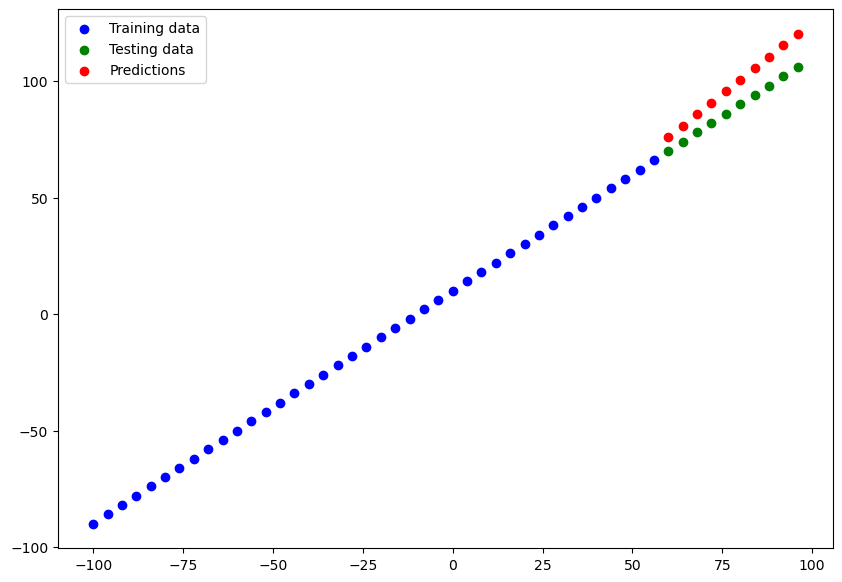

In [309]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [310]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.02835>,
 <tf.Tensor: shape=(), dtype=float32, numpy=107.83352>)

In [386]:
tf.random.set_seed(42)

initialize_wandb(project_name="regression_fundamentals", run_name="Dense:10,10,1.SGD.E500")
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500, callbacks=[WandbCallback()])

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▆▁▁▁▁▁▁▁▁▂▂█▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,▁▆▁▁▁▁▁▁▁▁▂▂█▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,99
loss,40.72149
mse,2247.11377


Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 42.2245 - mae: 42.2245
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 44.5340 - mae: 44.5340
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 56.0214 - mae: 56.0214
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 41.2025 - mae: 41.2025
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 40.5714 - mae: 40.5714
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 40.7421 - mae: 40.7421
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 40.7504 - mae: 40.7504
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4915 - mae: 40.4915
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 41.2171 - mae: 41.2171
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 40.2499 - mae: 40.2499
Epoch 11/500
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 40.4978 - mae: 40.4978
Epoch 173/500
2/2 [==============================] - 0s 3ms/step - loss: 40.6924 - mae: 40.6924
Epoch 174/500
2/2 [==============================] - 0s 3ms/step - loss: 40.5875 - mae: 40.5875
Epoch 175/500
2/2 [==============================] - 0s 4ms/step - loss: 40.5379 - mae: 40.5379
Epoch 176/500
2/2 [==============================] - 0s 3ms/step - loss: 40.7935 - mae: 40.7935
Epoch 177/500
2/2 [==============================] - 0s 4ms/step - loss: 40.7568 - mae: 40.7568
Epoch 178/500
2/2 [==============================] - 0s 3ms/step - loss: 40.6118 - mae: 40.6118
Epoch 179/500
2/2 [==============================] - 0s 3ms/step - loss: 40.0376 - mae: 40.0376
Epoch 180/500
2/2 [==============================] - 0s 3ms/step - loss: 40.6687 - mae: 40.6687
Epoch 181/500
2/2 [==============================] - 0s 3ms/step - loss: 40.7214 - mae: 40.7214
Epoch 182/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 40.1108 - mae: 40.1108
Epoch 343/500
2/2 [==============================] - 0s 3ms/step - loss: 40.1467 - mae: 40.1467
Epoch 344/500
2/2 [==============================] - 0s 3ms/step - loss: 39.5489 - mae: 39.5489
Epoch 345/500
2/2 [==============================] - 0s 3ms/step - loss: 41.3172 - mae: 41.3172
Epoch 346/500
2/2 [==============================] - 0s 3ms/step - loss: 40.8628 - mae: 40.8628
Epoch 347/500
2/2 [==============================] - 0s 3ms/step - loss: 40.9648 - mae: 40.9648
Epoch 348/500
2/2 [==============================] - 0s 3ms/step - loss: 40.6569 - mae: 40.6569
Epoch 349/500
2/2 [==============================] - 0s 3ms/step - loss: 40.6890 - mae: 40.6890
Epoch 350/500
2/2 [==============================] - 0s 3ms/step - loss: 39.7454 - mae: 39.7454
Epoch 351/500
2/2 [==============================] - 0s 3ms/step - loss: 40.8792 - mae: 40.8792
Epoch 352/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 41ms/step


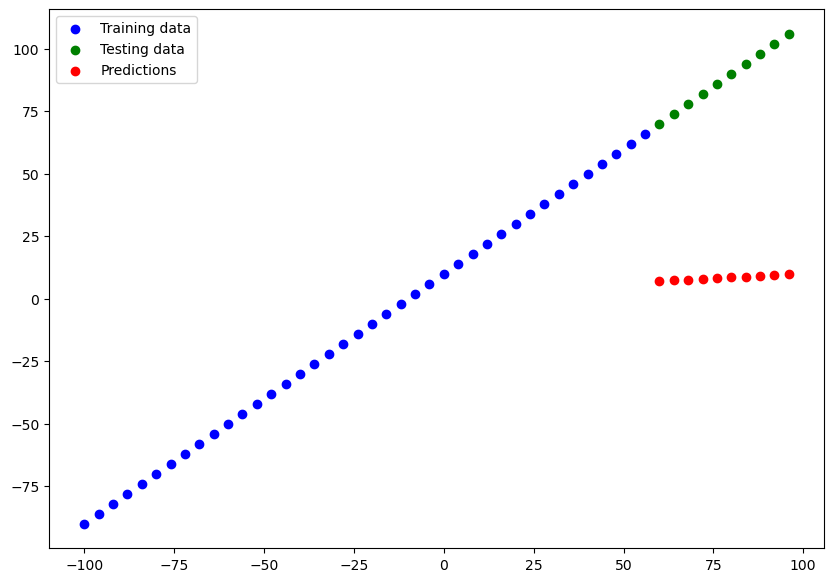

In [312]:
y_preds_3 =  model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [313]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=79.5864>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6446.7144>)

## Comparing the results of our experiments



In [314]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.375061,932.863281
1,model_2,10.028350,107.833519
2,model_3,79.586403,6446.714355


In [391]:
tf.random.set_seed(42)

initialize_wandb(project_name="regression_fundamentals", run_name="Dense:10,20,20,1.SGD.E:150")
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_4.fit(X_train, y_train, epochs=150, callbacks=[WandbCallback()])


Epoch 1/150
2/2 [==============================] - 1s 7ms/step - loss: 40.7305 - mae: 40.7305
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - loss: 42.6553 - mae: 42.6553
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 136.0347 - mae: 136.0347
Epoch 4/150
2/2 [==============================] - 0s 5ms/step - loss: 41.0769 - mae: 41.0769
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 40.6373 - mae: 40.6373
Epoch 6/150
2/2 [==============================] - 0s 5ms/step - loss: 40.7851 - mae: 40.7851
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 40.7534 - mae: 40.7534
Epoch 8/150
2/2 [==============================] - 0s 5ms/step - loss: 40.5509 - mae: 40.5509
Epoch 9/150
2/2 [==============================] - 0s 4ms/step - loss: 41.9822 - mae: 41.9822
Epoch 10/150
2/2 [==============================] - 0s 5ms/step - loss: 40.2495 - mae: 40.2495
Epoch 11/150
2/2 [==============================] - 0s 3m

1/1 [==============================] - 0s 43ms/step


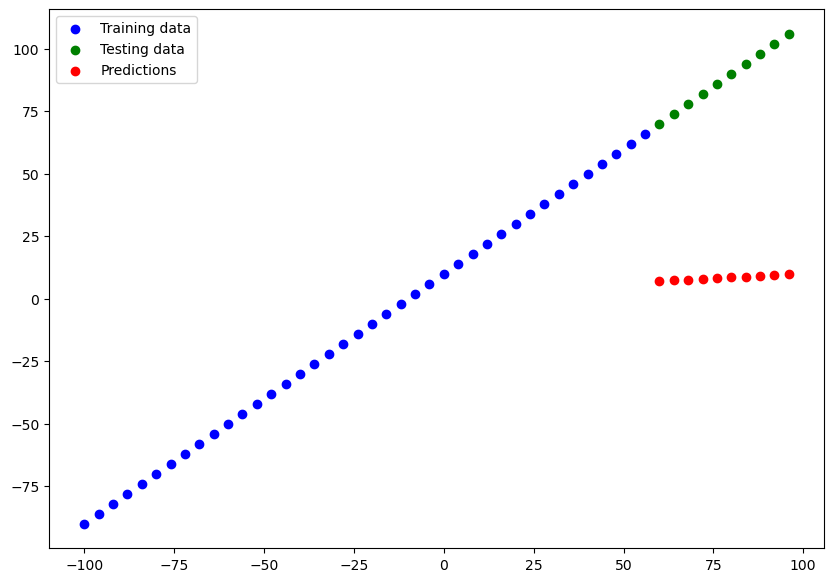

In [316]:
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [317]:
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=83.91062>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7160.85>)

In [393]:
tf.random.set_seed(42)

initialize_wandb(project_name="regression_fundamentals", run_name="Dense:10,20,20,1.Adam.E:150")
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_5.fit(X_train, y_train, epochs=150, callbacks=[WandbCallback()])


Epoch 1/150
2/2 [==============================] - 1s 8ms/step - loss: 41.1993 - mae: 41.1993
Epoch 2/150
2/2 [==============================] - 0s 5ms/step - loss: 40.8075 - mae: 40.8075
Epoch 3/150
2/2 [==============================] - 0s 5ms/step - loss: 40.7769 - mae: 40.7769
Epoch 4/150
2/2 [==============================] - 0s 4ms/step - loss: 40.6738 - mae: 40.6738
Epoch 5/150
2/2 [==============================] - 0s 4ms/step - loss: 40.4461 - mae: 40.4461
Epoch 6/150
2/2 [==============================] - 0s 5ms/step - loss: 40.7243 - mae: 40.7243
Epoch 7/150
2/2 [==============================] - 0s 4ms/step - loss: 40.7736 - mae: 40.7736
Epoch 8/150
2/2 [==============================] - 0s 4ms/step - loss: 40.3483 - mae: 40.3483
Epoch 9/150
2/2 [==============================] - 0s 5ms/step - loss: 40.4688 - mae: 40.4688
Epoch 10/150
2/2 [==============================] - 0s 4ms/step - loss: 40.2102 - mae: 40.2102
Epoch 11/150
2/2 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 78ms/step


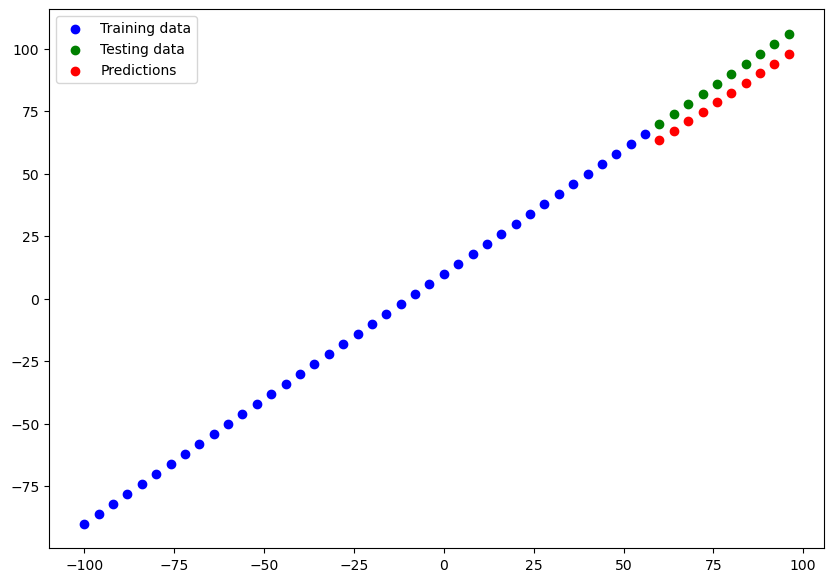

In [319]:
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [320]:
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mse_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=55.025055>,
 <tf.Tensor: shape=(), dtype=float32, numpy=55.025055>)

In [394]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
initialize_wandb(project_name="regression_fundamentals", run_name="Dense:1.Adam.E:100")
# 2. Compile the model
model_6.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# 3. Fit the model
model_6.fit(X_train, y_train, epochs=100, callbacks=[WandbCallback()])

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,▆▅▄▆▇▇▆▅▅▇█▆▅▄▃▆▆▅▄▅▄▅▅▅▅▄▅▅▄▃▅▄▂█▇▆▃▃▁▁
mae,▆▅▄▆▇▇▆▅▅▇█▆▅▄▃▆▆▅▄▅▄▅▅▅▅▄▅▅▄▃▅▄▂█▇▆▃▃▁▁
epoch,149
loss,39.86346
mae,39.86346


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 58.3798 - mae: 58.3798
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 56.9092 - mae: 56.9092
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 58.2242 - mae: 58.2242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 57.0200 - mae: 57.0200
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 55.8449 - mae: 55.8449
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 57.8419 - mae: 57.8419
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 57.8395 - mae: 57.8395
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 54.8413 - mae: 54.8413
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 55.8850 - mae: 55.8850
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 55.0043 - mae: 55.0043
Epoch 11/100
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 47ms/step


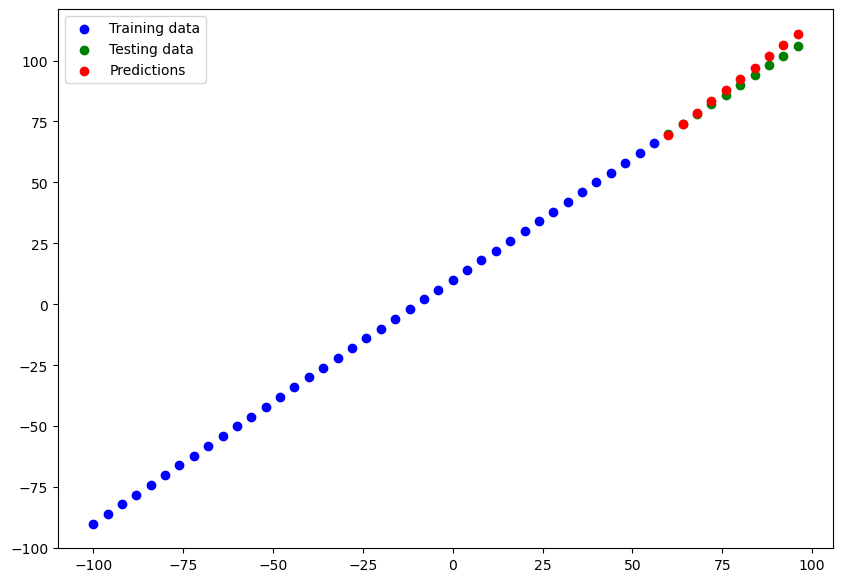

In [322]:
y_preds_6 = model_6.predict(X_test)
plot_predictions(predictions=y_preds_6)

In [323]:
mae_6 = mae(y_test, y_preds_6)
mse_6 = mse(y_test, y_preds_6)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3231125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.014697>)

One reallt good habin in machine learning modelling is to track the results of you experiments.
And when doing so, it cna be tedious if you're running lots of experiments.
Luckily, there are tools to help us!

**Resource**: As you build more models, you'll want to look into using
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plug sttaight into TensorBoard).

# Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our mode's too:

1. The SavedModel
2. THe HDF5 format

In [395]:
# Save model
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [396]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/home/kajetan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading in sa saved model

In [397]:
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 1, 1, 1, 20)       40        
                                                                 
 dense_38 (Dense)            (None, 1, 1, 1, 1)        21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [402]:
X_test = tf.expand_dims(X_test, axis=-1)
X_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[60],
       [64],
       [68],
       [72],
       [76],
       [80],
       [84],
       [88],
       [92],
       [96]], dtype=int32)>

In [411]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 14ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [417]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 1, 1, 1, 20)       40        
                                                                 
 dense_38 (Dense)            (None, 1, 1, 1, 1)        21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [420]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [421]:
loaded_SavedModel_format_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab..

In [422]:
# # Downloaded a file from Google Colab
# from google.colab import files
# files.downloaded("best_model_HDF5_format.h5")

In [423]:
# Save a file from Google Colab to a Google Drive
# !cp /content/best_model_HDF5_format.h5

# A larger example

In [429]:
import tensorflow as tf
import pandas as pd
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [433]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [434]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [436]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [438]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [439]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [440]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [442]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X) == len(X_train) + len(X_test)

True

In [451]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [483]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. Create a model
wandb.init(project="insurance_regression", name="Dense:10,1.SGD.E:100")
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

# 3. Fit model
insurance_model.fit(X_train, y_train, epochs=100, callbacks=[WandbCallback()])

Problem at: /home/kajetan/anaconda3/lib/python3.11/site-packages/wandb/sdk/wandb_init.py 848 getcaller


KeyboardInterrupt: 

In [484]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7384.5352 - mae: 7384.5352


[7384.53515625, 7384.53515625]

In [485]:
!pip install tensorflow_probability

import tensorflow_probability as tfp

# Assuming y_train is your tensor
percentile_value = tfp.stats.percentile(y_train, 50.0, interpolation='midpoint')

print("50th Percentile (Median):", percentile_value.numpy())

50th Percentile (Median): 9575.442


In [486]:
tf.reduce_mean(y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=13346.09>

In [487]:
X_test

<tf.Tensor: shape=(268, 11), dtype=float32, numpy=
array([[45.   , 25.175,  2.   , ...,  0.   ,  0.   ,  0.   ],
       [36.   , 30.02 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [64.   , 26.885,  0.   , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [38.   , 28.025,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [54.   , 47.41 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [51.   , 34.2  ,  1.   , ...,  0.   ,  0.   ,  1.   ]],
      dtype=float32)>

Right now it looks like our model isn't performing too well, let's try to improve it

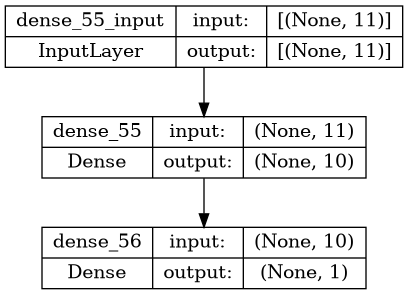

In [488]:
from tensorflow.keras.utils import plot_model
plot_model(model=insurance_model, show_shapes=True)

In [489]:
!pip install --upgrade wandb

In [491]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. Create a model
wandb.init(project="insurance_regression", name="Dense:10,10,1.SGD.E:100")
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

# 3. Fit model
insurance_model_1.fit(X_train, y_train, epochs=100, callbacks=[WandbCallback()])

Problem at: /home/kajetan/anaconda3/lib/python3.11/site-packages/wandb/sdk/wandb_init.py 848 getcaller


KeyboardInterrupt: 